In [1]:
import shadie

2021-08-10 10:55:13.588 | WARNING  | shadie.base.mutations:__init__:73 - shadie workflow strongly advises against the use of neutral mutations in SLiM simulation unless Chromosome parameter NSsites = False (default = True)


# Make the Chromosomes

In [5]:
m0 = shadie.mtype(0.2, 'n', -0.05, 0.015) # deleterious mutations with small dominance coeff
m1 = shadie.mtype(0.7, 'e', 0.1) # strong beneficial mutations with large dominance coeff
m2 = shadie.mtype(0.5, 'f', 0.0)


# define elements types
e0 = shadie.etype([m0, m1], [8, 0.1])
e1 = shadie.etype([m0], [1])
i0 = shadie.etype([m0], [1])
n0 = shadie.etype([m2], [1])

# design chromosome of elements

rand_chrom = shadie.chromosome.random(genome_size = 1e6, 
                                     #NS_sites = False, 
                                     seed = 1567,
                                     intron = i0,
                                     exon = [e0, e1],
                                     noncds = n0)

# define elements types
e0 = shadie.etype([m0, m1], [8, 0.1])
e1 = shadie.etype([m0], [1], "intron")
e2 = shadie.etype([m2], [1], "neutral")

neut_chrom = shadie.chromosome.explicit(genome_size = 1e6,
                                           #NS_sites = False, 
                                           data = {(0, 999997):e2,
                                                   (999997, 1000000):e1})

09:43 | WARNING | __init__        | shadie workflow strongly advises against the use of neutral mutations in SLiM simulation unless Chromosome parameter NSsites = False (default = True)


In [6]:
rand_chrom.inspect()
rand_chrom.zoom

alt.VConcatChart(...)

In [7]:
neut_chrom.inspect()
neut_chrom.zoom

alt.VConcatChart(...)

## Read in the Sims
*Sim blocks are at the end of the notebook

In [21]:
#Merge the sim runs 
merged_bryo = shadie.PostSim(
        ["bryo_branch6.trees", "bryo_neutral6.trees"],
        simlength = 2001,
        popsize = 1000,
        recomb = 1e-9, 
        mutrate = 1e-7,
        #chromosome = None,
)

merged_pter = shadie.PostSim(
        ["pter_branch6.trees", "pter_neutral6.trees"],
        simlength = 2001,
        popsize = 1000,
        recomb = 1e-9, 
        mutrate = 1e-7,
        #chromosome = None,
)

merged_angio = shadie.PostSim(
        ["angio_branch6.trees", "angio_neutral6.trees"],
        simlength = 2001,
        popsize = 1000,
        recomb = 1e-9, 
        mutrate = 1e-7,
        #chromosome = None,
)

In [22]:
merged_bryo.fullworkflow()
merged_bryo.stats()

Sampled 20 individuals from each population 50 times
Divergence: 0.0002942245506527941
Diversity: pop1 = nan, pop2 = 8.659307213708667e-05
Fst: nan
Tajima's D: pop1 = nan, pop2 = -inf
Root age: 4515.750697313443


Before, there were 6100 sample nodes (and 3228 individuals) in the tree sequence, and now there are 25 (sample nodes and 20 individuals).

Use `.sts` to access simplified tree sequnce and  `.sets`for summary statistics


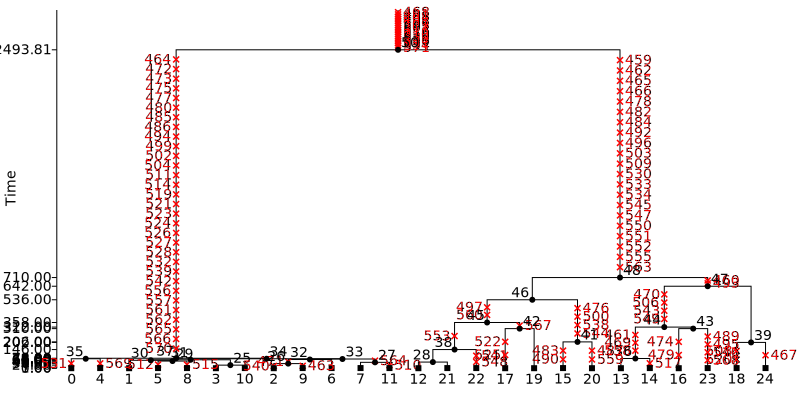

In [29]:
merged_bryo.simplify()
merged_bryo.quickplot(merged_bryo.sts,2)

In [4]:
merged_pter.fullworkflow()
merged_pter.stats()

Sampled 20 individuals from each population 50 times
Divergence: 0.0002447879298152447
Diversity: pop1 = 2.9828274645029822e-05, pop2 = 0.0001583201836711583
Fst: 0.4584381395018297
Tajima's D: pop1 = nan, pop2 = nan
Root age: 5376.457186000632


In [48]:
merged_pter.simplify(samplesize=20)
merged_pter.stats()

Before, there were 5883 sample nodes (and 3116 individuals) in the tree sequence, and now there are 54 (sample nodes and 40 individuals).

Use `.sts` to access simplified tree sequnce and  `.sets`for summary statistics
Divergence: 0.00025928545500025866
Diversity: [3.34285380e-05 1.48285566e-04]
Fst: 0.4810281517747844
Tajima's D: [-0.58344994 -0.38883407]
Root age: 5276.954240351736


In [17]:
merged_angio.fullworkflow()
merged_angio.stats(samplesize = 100)

Sampled 20 individuals from each population 10 times
Divergence: 0.00028338860550028335
Diversity: pop1 = 6.846955080006848e-06, pop2 = 4.855622850004855e-06
Fst: 0.9595693237822843
Tajima's D: pop1 = -0.19768961662066717, pop2 = -0.49824293196874125
Root age: 3713.2061767516334


In [14]:
merged_angio.simplify(samplesize=30)

Before, there were 5061 sample nodes (and 4056 individuals) in the tree sequence, and now there are 65 (sample nodes and 60 individuals).

Use `.sts` to access simplified tree sequnce and  `.sets`for summary statistics


In [77]:
merged_angio.rts

## Sims Below

In [8]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=rand_chrom, length = 2001, fileout = "bryo_branch6.trees")

    model.reproduction.bryophyte(
        mode='dio',
        chromosome = rand_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()

In [9]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=neut_chrom, length = 2001, fileout = "bryo_neutral6.trees")

    model.reproduction.bryophyte(
        mode='dio',
        chromosome = neut_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()

In [10]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=rand_chrom, length = 2001, fileout = "pter_branch6.trees")

    model.reproduction.pteridophyte(
        mode='mono',
        chromosome = rand_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()

In [11]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=neut_chrom, length = 2001, fileout = "pter_neutral6.trees")

    model.reproduction.pteridophyte(
        mode='mono',
        chromosome = neut_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()

In [59]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=rand_chrom, length = 2001, fileout = "angio_branch6.trees")

    model.reproduction.angiosperm(
        mode='dio',
        chromosome = rand_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()

In [13]:
with shadie.Model() as model:
    # init the model
    model.initialize(chromosome=neut_chrom, length = 2001, fileout = "angio_neutral6.trees")

    model.reproduction.angiosperm(
        mode='dio',
        chromosome = neut_chrom,
        diploid_ne=1000, 
        haploid_ne=1000,)

#print(model.script)
model.run()